Link: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images

We will use this script to download the dataset. This will help me fine tune the model

In [ ]:


!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gbalachandhiran
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images


100%|██████████| 1.76G/1.76G [00:04<00:00, 452MB/s]


In [ ]:
! pip install --upgrade --quiet transformers bitsandbytes datasets evaluate peft trl scikit-learn kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.8/375.8 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 129.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Define the base directory
base_dir = "/content/lung-and-colon-cancer-histopathological-images"

# Define the subdirectories and their labels
categories = {
    "lung_colon_image_set/colon_image_sets/colon_aca": "Colon Adenocarcinoma",
    "lung_colon_image_set/colon_image_sets/colon_n": "Colon Normal",
    "lung_colon_image_set/lung_image_sets/lung_aca": "Lung Adenocarcinoma",
    "lung_colon_image_set/lung_image_sets/lung_n": "Lung Normal",
    "lung_colon_image_set/lung_image_sets/lung_scc": "Lung Squamous Cell Carcinoma",
}


In [ ]:


from datasets import Dataset, DatasetDict
from PIL import Image

# Create lists to store image paths and labels
image_paths = []
labels = []

# Iterate through the categories and collect image paths and labels
for subdir, label in categories.items():
    dir_path = os.path.join(base_dir, subdir)
    for filename in os.listdir(dir_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(dir_path, filename))
            labels.append(label)

# Create a dictionary for the dataset
data = {'image': image_paths, 'label': labels}

# Create a Hugging Face Dataset from the dictionary
dataset = Dataset.from_dict(data)



In [ ]:
from typing import Any

TISSUE_CLASSES = [
    "A: colon_aca",
    "B: colon_n",
    "C: lung_aca",
    "D: lung_n",
    "E: lung_scc"
]

options = "\n".join(TISSUE_CLASSES)
PROMPT = f"What is the most likely tissue type shown in the histopathology image?\n{options}"


def format_data(example: dict[str, Any]) -> dict[str, Any]:
    example["messages"] = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                },
                {
                    "type": "text",
                    "text": PROMPT,
                },
            ],
        },
        {
            "role": "assistant",
            "content": [
                {
                    "type": "text",
                    "text": TISSUE_CLASSES[example["label"]],
                },
            ],
        },
    ]
    return example


In [ ]:
!pip install -q datasets
from datasets import Dataset, DatasetDict, Image

# Create lists to store file paths and corresponding labels
image_paths = []
labels = []
label_mapping = {v: k for k, v in enumerate(categories.values())} # Create a mapping from label string to integer

for category_path_suffix, label in categories.items():
    category_path = os.path.join(base_dir, category_path_suffix)
    for filename in os.listdir(category_path):
        if os.path.isfile(os.path.join(category_path, filename)):
            image_paths.append(os.path.join(category_path, filename))
            labels.append(label_mapping[label])

# Create a dictionary for the dataset
data = {'image': image_paths, 'label': labels}

# Create a Hugging Face Dataset
dataset = Dataset.from_dict(data).cast_column("image", Image())

# Split the dataset into training and validation sets (e.g., 90% train, 10% validation)
train_test_split = dataset.train_test_split(test_size=0.1, seed=42)
dataset_dict = DatasetDict({
    'train': train_test_split['train'],
    'validation': train_test_split['test']
})

# Select a subset of the data
dataset_dict["train"] = dataset_dict["train"].shuffle(seed=42).select(range(4000)) # Select 8000 images for training
dataset_dict["validation"] = dataset_dict["validation"].shuffle(seed=42).select(range(500)) # Select 1000 images for validation

print(dataset_dict)

# Apply the format_data function to the dataset
dataset_dict = dataset_dict.map(format_data)

dataset_dict

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 500
    })
})


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'messages'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['image', 'label', 'messages'],
        num_rows: 500
    })
})

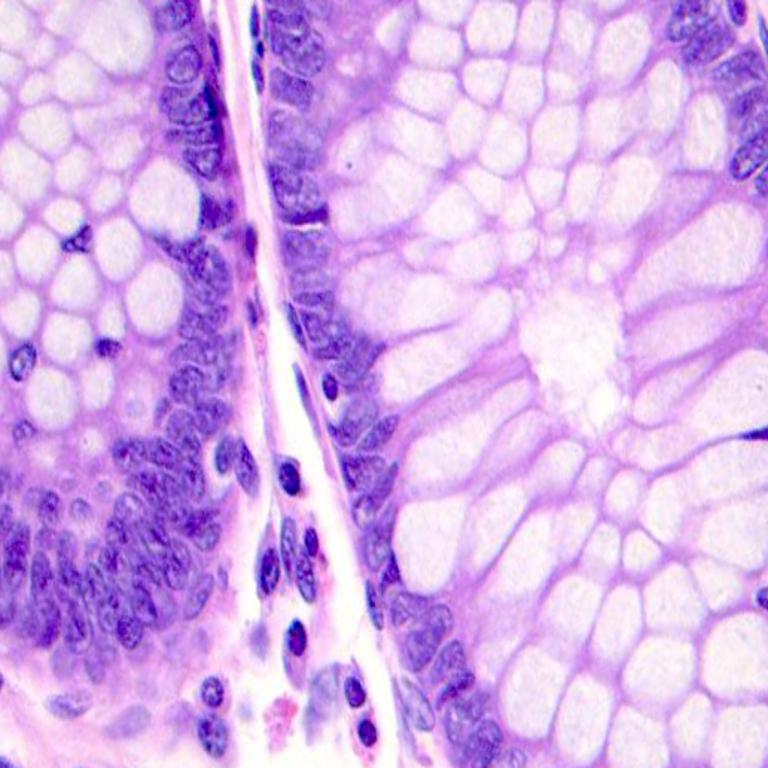

In [ ]:
dataset_dict['train'][1000]['image']

In [ ]:
dataset_dict['train'][1000]['label']

1

5. Processing the dataset
Before processing the dataset, it is important to first check the names of the labels to ensure proper handling of the classification task.




In [ ]:
# Access the class names from the categories dictionary
LUNG_AND_COLON_CANCER = list(categories.values())
print("Detected classes:", LUNG_AND_COLON_CANCER)

Detected classes: ['Colon Adenocarcinoma', 'Colon Normal', 'Lung Adenocarcinoma', 'Lung Normal', 'Lung Squamous Cell Carcinoma']


In [ ]:
TISSUE_CLASSES = [
    "A: colon_aca",
    "B: colon_n",
    "C: lung_aca",
    "D: lung_n",
    "E: lung_scc"
]
options = "\n".join(TISSUE_CLASSES)
PROMPT = f"What is the most likely type of cancer type shown in the histopathology image?\n{options}"

In [ ]:
def format_data(example: dict[str, any]) -> dict[str, any]:
    example["messages"] = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                },
                {
                    "type": "text",
                    "text": PROMPT,
                },
            ],
        },
        {
            "role": "assistant",
            "content": [
                {
                    "type": "text",
                    "text": TISSUE_CLASSES[example["label"]],
                },
            ],
        },
    ]

    # Manually construct the prompt string with the image token placeholder
    # Based on the model's expected format, the image token should precede the text prompt
    image_token = processor.tokenizer.special_tokens_map["boi_token"] # Assuming 'boi_token' is the image token
    formatted_prompt = f"{image_token}\n{PROMPT}"


    example["messages"] = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                },
                {
                    "type": "text",
                    "text": formatted_prompt,
                },
            ],
        },
        {
            "role": "assistant",
            "content": [
                {
                    "type": "text",
                    "text": TISSUE_CLASSES[example["label"]],
                },
            ],
        },
    ]

    return example

# Apply the formatting to the dataset
formatted_data = dataset_dict.map(format_data)

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
formatted_data["train"][600]["messages"]

[{'content': [{'text': None, 'type': 'image'},
   {'text': 'What is the most likely type of cancer type shown in the histopathology image?\nA: colon_aca\nB: colon_n\nC: lung_aca\nD: lung_n\nE: lung_scc',
    'type': 'text'}],
  'role': 'user'},
 {'content': [{'text': 'A: colon_aca', 'type': 'text'}], 'role': 'assistant'}]

In [ ]:
from huggingface_hub import login
import os

hf_token = os.environ.get("HF_TOKEN")
login(hf_token)

In [ ]:
import torch
from transformers import AutoProcessor, AutoModelForImageTextToText, BitsAndBytesConfig

model_id = "google/medgemma-4b-it"

# Check if GPU supports bfloat16
if torch.cuda.get_device_capability()[0] < 8:
    raise ValueError("GPU does not support bfloat16, please use a GPU that supports bfloat16.")

model_kwargs = dict(
    attn_implementation="eager",
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

model = AutoModelForImageTextToText.from_pretrained(model_id, **model_kwargs)
processor = AutoProcessor.from_pretrained(model_id)

# Use right padding to avoid issues during training
processor.tokenizer.padding_side = "right"

config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

In [ ]:
from peft import LoraConfig

peft_config = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.05,
    r=16,
    bias="none",
    target_modules="all-linear",
    task_type="CAUSAL_LM",
    modules_to_save=[
        "lm_head",
        "embed_tokens",
    ],
)

## Collate function create input to model

In [ ]:
def collate_fn(examples: list[dict[str, any]]):
    texts = []
    images = []
    for example in examples:
        images.append([example["image"]])
        texts.append(
            processor.apply_chat_template(
                example["messages"], add_generation_prompt=False, tokenize=False
            ).strip()
        )

    # Tokenize the texts and process the images
    batch = processor(text=texts, images=images, return_tensors="pt", padding=True)

    # The labels are the input_ids, with the padding and image tokens masked in
    # the loss computation
    labels = batch["input_ids"].clone()

    # Mask image tokens
    image_token_id = [
        processor.tokenizer.convert_tokens_to_ids(
            processor.tokenizer.special_tokens_map["boi_token"]
        )
    ]
    # Mask tokens that are not used in the loss computation
    labels[labels == processor.tokenizer.pad_token_id] = -100
    labels[labels == image_token_id] = -100
    labels[labels == 262144] = -100

    batch["labels"] = labels
    return batch

In [ ]:
from trl import SFTConfig

args = SFTConfig(
    output_dir="medgemma-Histopathology-lung-colon",
    num_train_epochs=1,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=16,  # Increased accumulation steps
    gradient_checkpointing=True, # Enable gradient checkpointing
    gradient_checkpointing_kwargs={"use_reentrant": False}, # Set use_reentrant to False
    optim="adamw_torch_fused",
    logging_steps=0.1,
    save_strategy="steps",
    save_steps=0.1, # Set save_steps to match eval_steps
    eval_strategy="steps",
    eval_steps=0.1,
    learning_rate=2e-4,
    bf16=True,
    max_grad_norm=0.3,
    warmup_ratio=0.03,
    lr_scheduler_type="linear",
    push_to_hub=True,
    report_to="none",
    dataset_kwargs={"skip_prepare_dataset": True},
    remove_unused_columns = False,
    label_names=["labels"],
    metric_for_best_model="eval_loss",
    load_best_model_at_end=True
)

In [ ]:
!nvidia-smi

Sat Jun 28 07:25:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             52W /  400W |    9907MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
from trl import SFTTrainer
from transformers import EarlyStoppingCallback
early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=2,  # Number of evaluation steps to wait before stopping
    early_stopping_threshold=0.01, # Minimum improvement required to consider as not stopped
)



trainer = SFTTrainer(
    model=model,
    args=args,
    train_dataset=formatted_data["train"],
    eval_dataset=formatted_data["validation"].shuffle().select(range(10)),
    peft_config=peft_config,
    processing_class=processor,
    data_collator=collate_fn,
    callbacks=[early_stopping_callback], # Add the callback here
)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


In [ ]:
trainer.train()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Step,Training Loss,Validation Loss
25,26.993700,0.061322
50,0.776700,0.031854
75,0.465600,0.023949
100,0.424200,0.025379


TrainOutput(global_step=100, training_loss=7.165067472457886, metrics={'train_runtime': 6433.8473, 'train_samples_per_second': 0.622, 'train_steps_per_second': 0.039, 'total_flos': 1.3405951033249632e+16, 'train_loss': 7.165067472457886})

In [ ]:
# prompt: Let us save the trained model

trainer.save_model("medgemma-Histopathology-lung-colon-hugging-face")


In [ ]:
# prompt: Push the model to huigging face

trainer.push_to_hub()

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/gbalachandhiran/medgemma-Histopathology-lung-colon/commit/016c2469cbfde606388b26ca2424f8d0c29136d0', commit_message='End of training', commit_description='', oid='016c2469cbfde606388b26ca2424f8d0c29136d0', pr_url=None, repo_url=RepoUrl('https://huggingface.co/gbalachandhiran/medgemma-Histopathology-lung-colon', endpoint='https://huggingface.co', repo_type='model', repo_id='gbalachandhiran/medgemma-Histopathology-lung-colon'), pr_revision=None, pr_num=None)

First, let's define the image transformations. We'll use the `AutoImageProcessor` from the `transformers` library to handle resizing, normalization, and other necessary preprocessing steps based on the model's requirements.

In [ ]:
# Delete trainer and model to re-initialize cleanly
if 'trainer' in globals():
    del trainer
if 'model' in globals():
    del model

import torch
torch.cuda.empty_cache()

print("Trainer and model deleted. Ready to re-initialize.")

Trainer and model deleted. Ready to re-initialize.


In [ ]:
print(model.config)

Gemma3Config {
  "architectures": [
    "Gemma3ForConditionalGeneration"
  ],
  "boi_token_index": 255999,
  "eoi_token_index": 256000,
  "eos_token_id": [
    1,
    106
  ],
  "image_token_index": 262144,
  "initializer_range": 0.02,
  "mm_tokens_per_image": 256,
  "model_type": "gemma3",
  "quantization_config": {
    "_load_in_4bit": true,
    "_load_in_8bit": false,
    "bnb_4bit_compute_dtype": "bfloat16",
    "bnb_4bit_quant_storage": "bfloat16",
    "bnb_4bit_quant_type": "nf4",
    "bnb_4bit_use_double_quant": true,
    "llm_int8_enable_fp32_cpu_offload": false,
    "llm_int8_has_fp16_weight": false,
    "llm_int8_skip_modules": null,
    "llm_int8_threshold": 6.0,
    "load_in_4bit": true,
    "load_in_8bit": false,
    "quant_method": "bitsandbytes"
  },
  "text_config": {
    "attention_bias": false,
    "attention_dropout": 0.0,
    "attn_logit_softcapping": null,
    "cache_implementation": "hybrid",
    "final_logit_softcapping": null,
    "head_dim": 256,
    "hidden_ac